In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
 
plt.style.use('seaborn-deep')
pd.options.display.float_format = "{:,.2f}".format

In [2]:
from google.colab import files
upload = files.upload()

Saving INTC.csv to INTC.csv


In [0]:
stock_price =  pd.read_csv('INTC.csv',parse_dates=['Date'])

In [5]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 7 columns):
Date         1008 non-null datetime64[ns]
Open         1008 non-null float64
High         1008 non-null float64
Low          1008 non-null float64
Close        1008 non-null float64
Adj Close    1008 non-null float64
Volume       1008 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.2 KB


In [6]:
stock_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,"1,008.00","1,008.00","1,008.00","1,008.00","1,008.00","1,008.00"
mean,42.59,43.00,42.18,42.61,40.70,"24,484,411.06"
std,8.22,8.34,8.10,8.22,8.94,"10,841,096.82"
min,27.83,28.41,27.68,28.22,25.51,"5,893,800.00"
25%,35.30,35.50,35.06,35.27,32.84,"17,858,525.00"
50%,44.32,44.88,43.75,44.46,42.57,"21,896,750.00"
75%,49.30,49.99,48.68,49.37,47.89,"28,067,175.00"
max,58.95,59.59,58.50,58.90,58.90,"116,479,000.00"


In [0]:
stock_price = stock_price[['Date','Adj Close']]

In [8]:
stock_price.columns = ['ds', 'y']
stock_price.head(10)

,ds,y
0,2015-12-14,30.88
1,2015-12-15,31.52
2,2015-12-16,31.63
3,2015-12-17,31.28
4,2015-12-18,30.35
5,2015-12-21,30.68
6,2015-12-22,31.12
7,2015-12-23,31.36
8,2015-12-24,31.34
9,2015-12-28,31.30


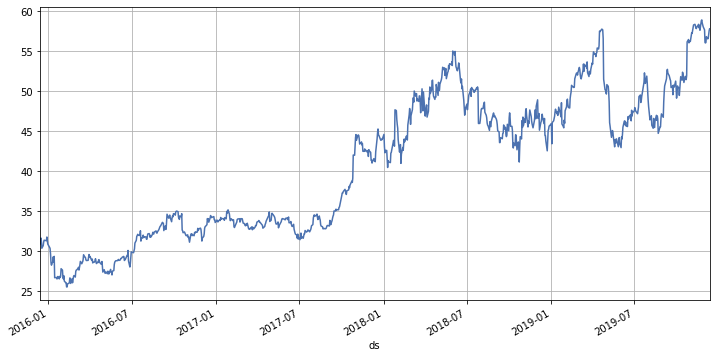

In [9]:
stock_price.set_index('ds').y.plot(figsize=(12,6), grid=True);

In [10]:
model = Prophet()
model.fit(stock_price)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = model.make_future_dataframe(365, freq='d')

future_boolean = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[future_boolean] 

future.tail()

,ds
1367,2020-12-07
1368,2020-12-08
1369,2020-12-09
1370,2020-12-10
1371,2020-12-11


In [0]:
forecast = model.predict(future)

In [13]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1263,2020-12-07,64.65,50.17,81.62,49.44,80.70,0.52,0.52,0.52,-0.51,-0.51,-0.51,1.04,1.04,1.04,0.00,0.00,0.00,65.17
1264,2020-12-08,64.67,49.87,82.32,49.38,80.80,0.66,0.66,0.66,-0.42,-0.42,-0.42,1.09,1.09,1.09,0.00,0.00,0.00,65.34
1265,2020-12-09,64.70,50.40,81.64,49.33,80.90,0.68,0.68,0.68,-0.46,-0.46,-0.46,1.15,1.15,1.15,0.00,0.00,0.00,65.38
1266,2020-12-10,64.73,50.44,82.32,49.27,81.04,0.72,0.72,0.72,-0.49,-0.49,-0.49,1.21,1.21,1.21,0.00,0.00,0.00,65.45
1267,2020-12-11,64.75,50.09,81.97,49.22,81.14,0.75,0.75,0.75,-0.53,-0.53,-0.53,1.28,1.28,1.28,0.00,0.00,0.00,65.50


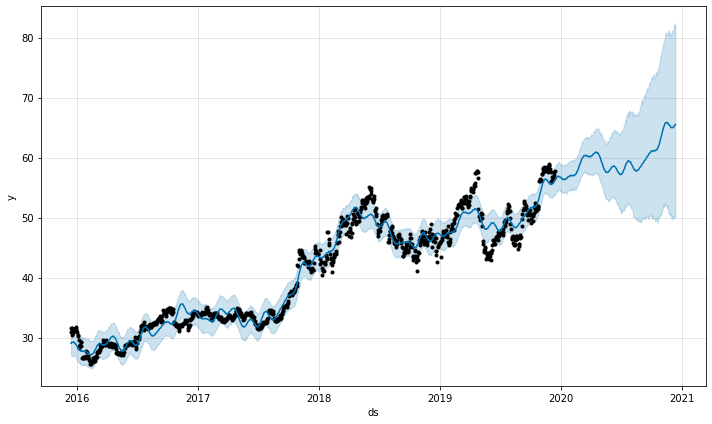

In [14]:
model.plot(forecast);